In [1]:
import pandas as pd
import numpy as np

In [5]:
df  = pd.read_csv('data/housing.csv')

In [6]:
# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston.data)
# df.columns = boston.feature_names
# df['PRICE'] = boston.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
import seaborn as sns

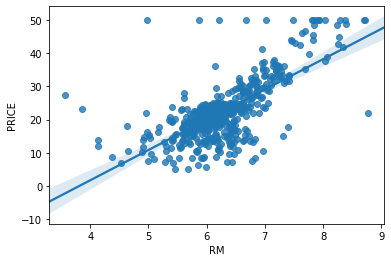

In [9]:
sns.regplot(x='RM', y='PRICE', data=df)

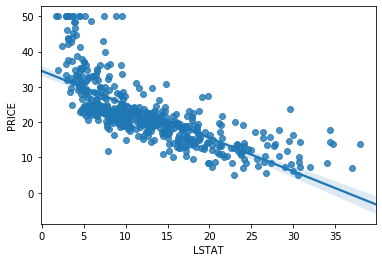

In [10]:
sns.regplot(x='LSTAT', y='PRICE', data=df)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
?LinearRegression

Init signature:
LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, optional, default True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``nor

In [14]:
lr = LinearRegression()

In [15]:
x = df[['LSTAT', 'RM']]
y = df['PRICE']

In [16]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
coefs = lr.coef_
coefs

array([-0.64235833,  5.09478798])

In [29]:
lr.intercept_

-1.3582728118744605

In [31]:
df['PREDICTION'] = lr.predict(x)

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,28.941014
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.484206
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.659075
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.406520
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.630407


In [36]:
np.dot(df[['LSTAT', 'RM']].head(1), lr.coef_) + lr.intercept_

array([28.94101368])

In [38]:
lr.score(x, y).round(2)

0.64

In [18]:
from sklearn.linear_model import Lasso

In [19]:
?Lasso

Init signature:
Lasso(
    alpha=1.0,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, optional
    Constant that multiplies the L1 term. Defaults to 1.0.
    ``alpha = 0`` is equivalent to an ordinary least square, solved
    by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.

fit_intercept

In [20]:
lass = Lasso()

In [21]:
lass.fit(x, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
lass.coef_

array([-0.80752827,  2.03473108])

In [23]:
from sklearn.linear_model import LassoCV

In [24]:
lassCV = LassoCV()

In [25]:
lassCV.fit(x, y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [26]:
lassCV.coef_

array([-0.65038939,  4.94654933])

In [28]:
lassCV.intercept_

-0.32502964759351016